### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split  
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score  
from sklearn.metrics import precision_score, recall_score 
from sklearn.metrics import f1_score, matthews_corrcoef 
from sklearn.metrics import confusion_matrix 
from sklearn import tree


#### Importing dataset

In [2]:
path = "D:\Manvi\Data_Science\Sparks_intern\iris.csv"
data = pd.read_csv(path)

data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


#### Exploring the Dataset

In [3]:
data.drop('Id',axis=1,inplace=True)
print(data.shape)


(150, 5)


In [4]:
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [5]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
pd.isnull(data).sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

#### Find and replace method to Encode categorical variable. 


In [8]:
nums = {"Species": {'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2}}
data.replace(nums, inplace=True)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Data visualization for further understanding the data

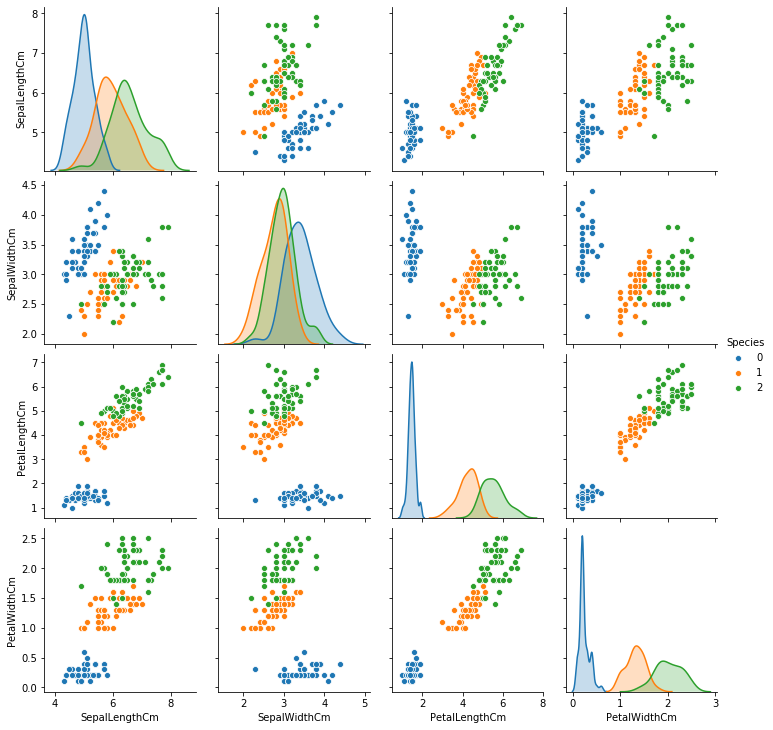

In [9]:
import seaborn as sns
sns.pairplot(data,hue='Species')

Iris-setosa can be highlt attributed with Petal Length and Petal Width. However the other two cannot be. 

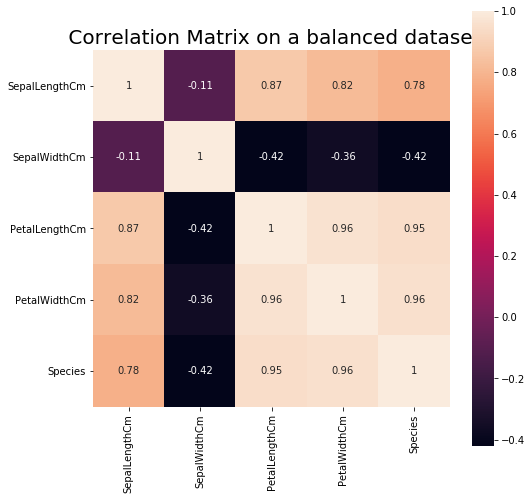

In [10]:
corrmat = data.corr() 
fig = plt.figure(figsize = (8, 8)) 
map=sns.heatmap(corrmat, vmax = 1, square = True,annot=True) 
map.set_title(' Correlation Matrix on a balanced dataset', fontsize=20)
plt.show()

All the features are highly corerelated to one other. This tells us that every features effects every other feature.

#### Individual Box plots to show spreads of data columns and there respective percentile distributions.

Text(0.5, 1.0, 'Box plot for PetalWidthCm')

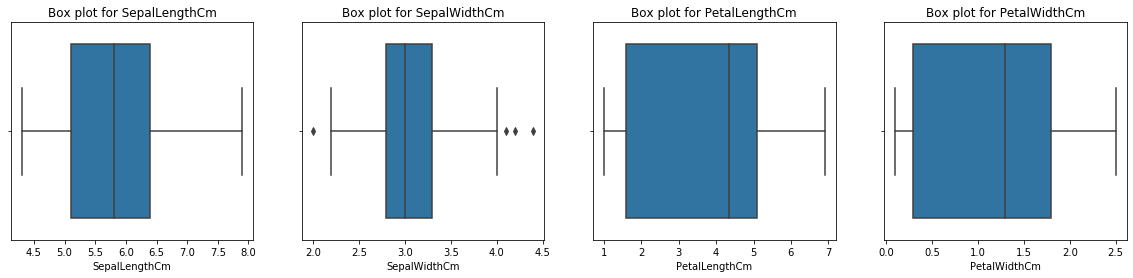

In [11]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

sns.boxplot(data['SepalLengthCm'],ax=axes[0])
axes[0].set_title('Box plot for SepalLengthCm')

sns.boxplot(data['SepalWidthCm'], ax=axes[1])
axes[1].set_title('Box plot for SepalWidthCm')

sns.boxplot(data['PetalLengthCm'], ax=axes[2])
axes[2].set_title('Box plot for PetalLengthCm')

sns.boxplot(data['PetalWidthCm'], ax=axes[3])
axes[3].set_title('Box plot for PetalWidthCm')

#### Box plots to see individual feature distinction with respect to the three flower types.

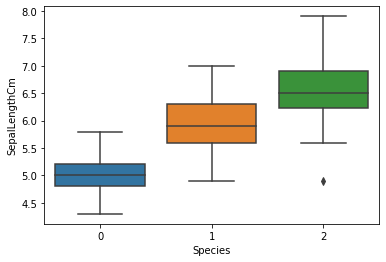

In [12]:
ax=sns.boxplot(x='Species', y='SepalLengthCm',data=data)

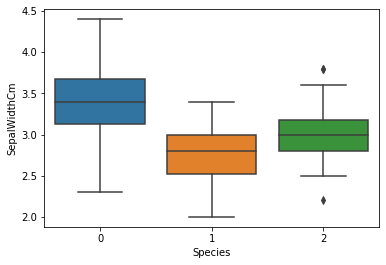

In [13]:
ax=sns.boxplot(x='Species', y='SepalWidthCm',data=data)

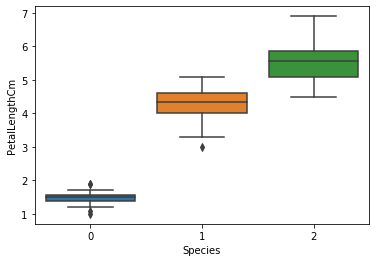

In [14]:
ax=sns.boxplot(x='Species', y='PetalLengthCm',data=data)

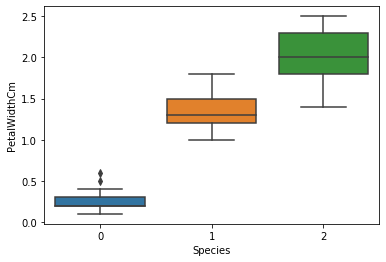

In [15]:
ax=sns.boxplot(x='Species', y='PetalWidthCm',data=data)

This proves our above observations.

### Preparing data for Decision Tree Classifier

In [16]:
X = (data.drop('Species', axis=1)).values
y = data['Species']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

In [18]:


tree_params = {"criterion": ["gini", "entropy"], "max_depth": [1,5,10,50,100,500,1000], 
              "min_samples_split": [5,10,100,5000]}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)
# tree best estimator
tree_clf = grid_tree.best_estimator_
print(tree_clf)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


Max depth = 5, Criteria = gini, min_samples_split=5

#### Applying model on dataset

In [19]:
model=DecisionTreeClassifier(criterion='gini',max_depth=5, min_samples_split=5,random_state=0)
model.fit(X_train, y_train)
Pred=model.predict(X_test)


#### Comparing actual and predicted results

In [20]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': Pred})  

df


,Actual,Predicted
114,2,2
62,1,1
33,0,0
107,2,2
7,0,0
100,2,2
40,0,0
86,1,1
76,1,1
71,1,1


In [21]:


acc = accuracy_score(y_test, Pred) 
print("Classifiers has a accuracy of {}".format(acc))
prec = precision_score(y_test, Pred, pos_label='positive',average='micro') 
print("Classifiers has a precision of {}".format(prec))

Classifiers has a accuracy of 0.9666666666666667
Classifiers has a precision of 0.9666666666666667


C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


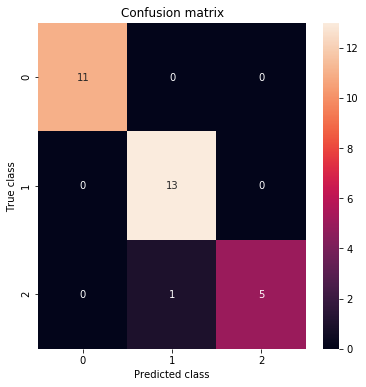

In [22]:
plt.figure(figsize =(6, 6)) 
sns.heatmap(confusion_matrix(y_test,Pred,labels = [0,1,2]),annot = True); 
plt.title("Confusion matrix") 
plt.ylabel('True class') 
plt.xlabel('Predicted class') 
plt.show() 

 

#### Visualizing the Decision Tree model

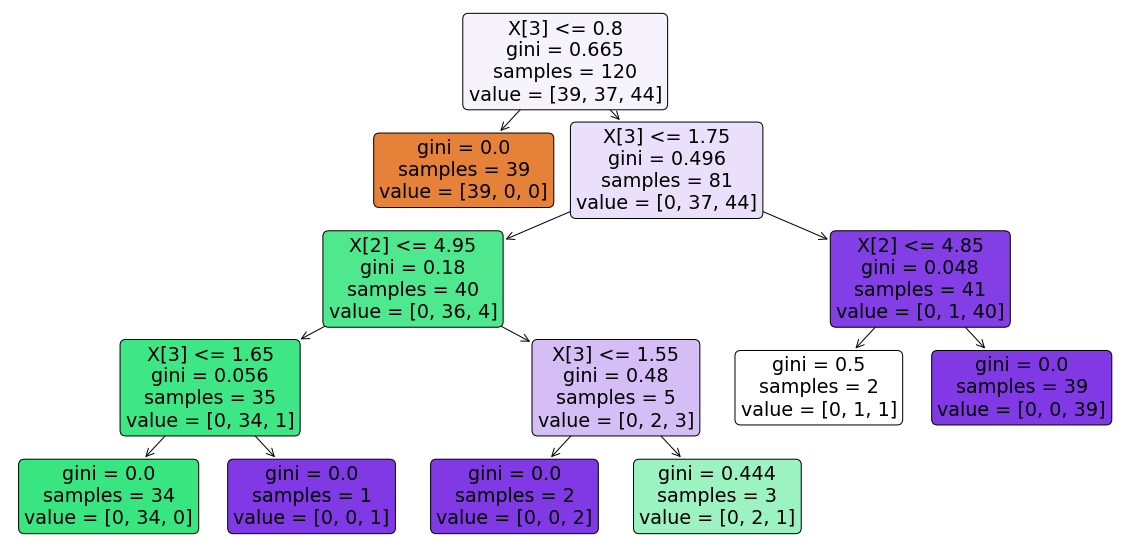

In [26]:

plt.figure(figsize=(20,10))
tree.plot_tree(model,rounded=True,filled=True)
plt.show()